In [123]:
import tensorflow as tf
from tensorflow.keras import layers, models
import random
import numpy as np

In [124]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [125]:
##Load mnist dataset
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [126]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [127]:
def plotIm(index):
    from matplotlib import pyplot as plt
    plt.imshow(x_train[index])
    plt.show()

    print("Letter is ",y_train[index])

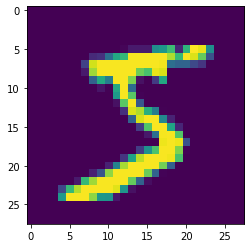

Letter is  5


In [128]:
plotIm(0)

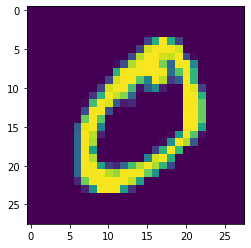

Letter is  0


In [129]:
plotIm(1)

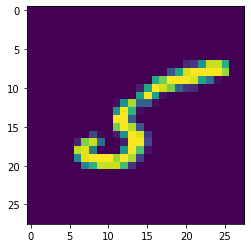

Letter is  5


In [130]:
plotIm(11)

In [131]:
x_train = x_train.reshape(60000,28*28)
x_train.shape

(60000, 784)

In [132]:
x_test = x_test.reshape(10000,28*28)
x_test.shape

(10000, 784)

In [133]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [134]:
x_train = x_train/255

In [135]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [136]:
x_test = x_test/255

In [137]:
## One hot encoding
print(y_train[0])
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

5


In [138]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [139]:
print(y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [140]:
dnnModel = models.Sequential()
dnnModel.add(layers.Dense(50,activation="relu", input_shape=(28*28,)))
dnnModel.add(layers.Dense(30,activation="relu"))
dnnModel.add(layers.Dense(10,activation="softmax"))

dnnModel.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [141]:
dnnModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


In [142]:
dnnModel.fit(x_train,y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3652 - accuracy: 0.8956
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1709 - accuracy: 0.9507
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1264 - accuracy: 0.9626
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1022 - accuracy: 0.9700
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0862 - accuracy: 0.9748
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0752 - accuracy: 0.9770
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0659 - accuracy: 0.9796
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0580 - accuracy: 0.9823
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0515 - accuracy: 0.9839
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0465 - accuracy: 0.9854

In [143]:
loss,acc = dnnModel.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1016 - accuracy: 0.9718


In [144]:
print(loss)
print(acc)

0.10164810717105865
0.9718000292778015


In [147]:
##Predict vs pre_classes
y_pred = dnnModel.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [148]:
print(y_pred)

[7 2 1 ... 4 5 6]


In [149]:
tf.math.confusion_matrix(np.argmax(y_test, axis=1),y_pred)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    1,    0,    1,    1,    5,    4,    1,    1,    0],
       [   0, 1125,    1,    4,    0,    1,    2,    0,    2,    0],
       [   5,    2,  987,    7,    8,    0,    4,    4,   14,    1],
       [   1,    0,    2,  977,    3,   12,    0,    3,    5,    7],
       [   1,    0,    4,    0,  962,    1,    2,    3,    1,    8],
       [   3,    0,    0,    8,    1,  865,    7,    0,    6,    2],
       [   4,    3,    0,    1,    6,    4,  939,    0,    1,    0],
       [   2,    6,   10,    4,    8,    0,    0,  987,    1,   10],
       [   5,    1,    2,    6,    4,    5,    2,    2,  943,    4],
       [   4,    2,    0,    5,   17,    2,    0,    6,    6,  967]])>